In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import wmi
cpuinfo = wmi.WMI()
for cpu in cpuinfo.Win32_Processor():
    print(cpu.Name)

Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz


In [4]:
marker = ['s','o', 'D', 'P', '^','v']

# Simulated data

## Loss function 

In [5]:
# KL loss
def KL(X, Xhat, obs):
    X=np.array(X)
    Xhat=np.array(Xhat)
    obs=np.array(obs)
    return (Xhat * obs - X * obs - X * np.log(Xhat/X) * obs).sum()/obs.sum()

In [6]:
# Frobenius loss of log
def frob(X, Xhat, obs):
    X=np.array(X)
    Xhat=np.array(Xhat)
    obs=np.array(obs)
    return (((np.log(Xhat/X) * obs)**2).sum()/obs.sum())**(1/2)

In [7]:
# normalized squared error loss
def nse(X, Xhat, obs):
    X=np.array(X)
    Xhat=np.array(Xhat)
    obs=np.array(obs)
    return ((Xhat * obs - X * obs)**2 / X).sum()/obs.sum()

## change the length of matrix 

In [8]:
df1 = pd.DataFrame(np.zeros([10,5]), 
                  index=[str(p) for p in range(100,1100,100)], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI','MLE'])
df2 = pd.DataFrame(np.zeros([10,5]), 
                  index=[str(p) for p in range(100,1100,100)], 
                  columns=['EBPM', 'UKLA', 'PMLSVT',  'LORI','MLE'])
df3 = pd.DataFrame(np.zeros([10,5]), 
                  index=[str(p) for p in range(100,1100,100)], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE'])
df4 = pd.DataFrame(np.zeros([10,4]), 
                  index=[str(p) for p in range(100,1100,100)], 
                  columns=['EBPM', 'UKLA',  'PMLSVT','LORI'])

In [9]:
## denoise performance
for p in range(100,1100,100):
    KL_error, frob_error, nse_error = np.zeros(5), np.zeros(5), np.zeros(5)
    for n in range(1,11):
        Y = np.loadtxt('simulated data/'+str(p)+'-100-10-'+str(n)+'.txt')
        M = np.loadtxt('simulated data/'+str(p)+'-100-10-'+str(n)+'-raw.txt')
        obs = np.ones([p,100])
        M1 = np.exp(np.loadtxt('EBPM/'+str(p)+'-100-10-'+str(n)+'-denoise.txt'))
        M2 = np.loadtxt('UKLA/'+str(p)+'-100-10-'+str(n)+'-denoise.txt')
        M3 = np.loadtxt('PMLSVT/'+str(p)+'-100-10-'+str(n)+'-denoise.txt')
        M4 = np.exp(np.loadtxt('lori/'+str(p)+'-100-10-'+str(n)+'-denoise.txt'))
        M5 = Y + .5 * (Y == 0)
        KL_error = KL_error + np.array([KL(M,M1,obs),KL(M,M2,obs),KL(M,M3,obs),KL(M,M4,obs),KL(M,M5,obs)])
        frob_error = frob_error + np.array([frob(M,M1,obs),frob(M,M2,obs),frob(M,M3,obs),frob(M,M4,obs),frob(M,M5,obs)])
        nse_error = nse_error + np.array([nse(M,M1,obs),nse(M,M2,obs),nse(M,M3,obs),nse(M,M4,obs),nse(M,M5,obs)])
    df1.loc[str(p)]=np.log10(KL_error/10)
    df2.loc[str(p)]=np.log10(frob_error/10)
    df3.loc[str(p)]=np.log10(nse_error/10)
    df4.loc[str(p)]=np.log10([np.mean(np.loadtxt('EBPM/'+str(p)+'-100-10-denoise time.txt')),
                    np.mean(np.loadtxt('UKLA/'+str(p)+'-100-10-denoise time.txt')),
                    np.mean(np.loadtxt('PMLSVT/'+str(p)+'-100-10-denoise time.txt')),
                             np.mean(np.loadtxt('lori/'+str(p)+'-100-10-denoise time.txt'))])

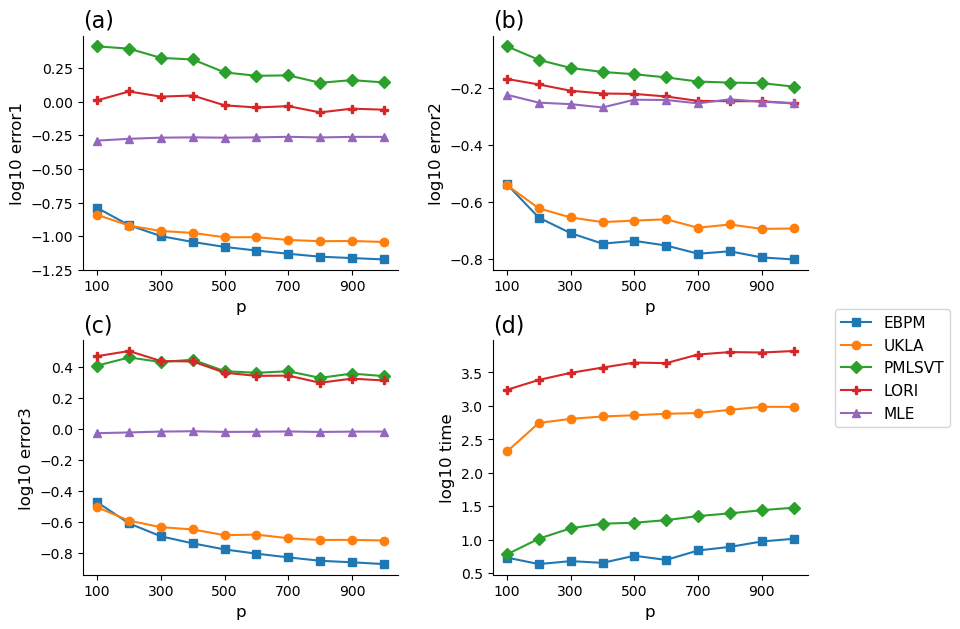

In [10]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,7))
for i in range(2):
    for j in range(2):
        axes[i][j].spines['right'].set_visible(False)
        axes[i][j].spines['top'].set_visible(False)
        axes[i][j].set_xlabel('',fontsize=12)
        axes[i][j].set_ylabel('',fontsize=12)
plt.subplots_adjust(left=None, bottom=None, right=.85, top=None,
                wspace=0.3, hspace=0.3)
df1.plot(ax=axes[0][0],xlabel='p',ylabel='log10 error1',legend=False)
df2.plot(ax=axes[0][1],xlabel='p',ylabel='log10 error2',legend=False)
df3.plot(ax=axes[1][0],xlabel='p',ylabel='log10 error3',legend=False)
df4.plot(ax=axes[1][1],xlabel='p',ylabel='log10 time',legend=False)
for i in range(2):
    for j in range(2):
        for k, line in enumerate(axes[i][j].get_lines()):
            line.set_marker(marker[k])
axes[0][0].set_title('(a)',loc='left',fontsize=16)
axes[0][1].set_title('(b)',loc='left',fontsize=16)
axes[1][0].set_title('(c)',loc='left',fontsize=16)
axes[1][1].set_title('(d)',loc='left',fontsize=16)
lines, labels=axes[0][0].get_legend_handles_labels()
fig.legend(lines,labels,prop={'size': 11},bbox_to_anchor=(1, 0.5))
plt.savefig('figure1.pdf')
plt.show()

In [11]:
df1 = pd.DataFrame(np.zeros([10,6]), 
                  index=[str(p) for p in range(100,1100,100)], 
                  columns=['EBPM',  'UKLA', 'PMLSVT','LORI', 'MLE','EBPM_iter=0'])
df2 = pd.DataFrame(np.zeros([10,6]), 
                  index=[str(p) for p in range(100,1100,100)], 
                  columns=['EBPM',  'UKLA', 'PMLSVT','LORI', 'MLE','EBPM_iter=0'])
df3 = pd.DataFrame(np.zeros([10,6]), 
                  index=[str(p) for p in range(100,1100,100)], 
                  columns=['EBPM', 'UKLA', 'PMLSVT','LORI', 'MLE','EBPM_iter=0'])
df4 = pd.DataFrame(np.zeros([10,4]), 
                  index=[str(p) for p in range(100,1100,100)], 
                  columns=['EBPM', 'UKLA', 'PMLSVT','LORI'])

In [12]:
## completion performance
for p in range(100,1100,100):
    KL_error, frob_error, nse_error = np.zeros(6), np.zeros(6), np.zeros(6)
    for n in range(1,11):
        Y = np.loadtxt('simulated data/'+str(p)+'-100-10-'+str(n)+'.txt')
        M = np.loadtxt('simulated data/'+str(p)+'-100-10-'+str(n)+'-raw.txt')
        obs = np.loadtxt('simulated data/'+str(p)+'-100-10-'+str(n)+'-obs.txt')
        M1 = np.exp(np.loadtxt('EBPM/'+str(p)+'-100-10-'+str(n)+'-complete.txt'))
        M2 = np.loadtxt('UKLA/'+str(p)+'-100-10-'+str(n)+'-complete.txt')
        M3 = np.loadtxt('PMLSVT/'+str(p)+'-100-10-'+str(n)+'-complete.txt')
        M4 = np.exp(np.loadtxt('lori/'+str(p)+'-100-10-'+str(n)+'-complete.txt'))
        M5 = (Y + .5 * (Y == 0))*obs + (Y*obs).sum()/obs.sum()*(1-obs)
        M6 = np.exp(np.loadtxt('EBPM_iter=0/'+str(p)+'-100-10-'+str(n)+'-complete.txt'))
        KL_error = KL_error + np.array([KL(M,M1,1-obs),KL(M,M2,1-obs),KL(M,M3,1-obs),KL(M,M4,1-obs),KL(M,M5,1-obs),KL(M,M6,1-obs)])
        frob_error = frob_error + np.array([frob(M,M1,1-obs),frob(M,M2,1-obs),frob(M,M3,1-obs),frob(M,M4,1-obs),frob(M,M5,1-obs),frob(M,M6,1-obs)])
        nse_error = nse_error + np.array([nse(M,M1,1-obs),nse(M,M2,1-obs),nse(M,M3,1-obs),nse(M,M4,1-obs),nse(M,M5,1-obs),nse(M,M6,1-obs)])
    df1.loc[str(p)]=np.log10(KL_error/10)
    df2.loc[str(p)]=np.log10(frob_error/10)
    df3.loc[str(p)]=np.log10(nse_error/10)
    df4.loc[str(p)]=np.log10([np.mean(np.loadtxt('EBPM/'+str(p)+'-100-10-complete time.txt')),
                    np.mean(np.loadtxt('UKLA/'+str(p)+'-100-10-complete time.txt')),
                    np.mean(np.loadtxt('PMLSVT/'+str(p)+'-100-10-complete time.txt')),
                    np.mean(np.loadtxt('lori/'+str(p)+'-100-10-complete time.txt'))])

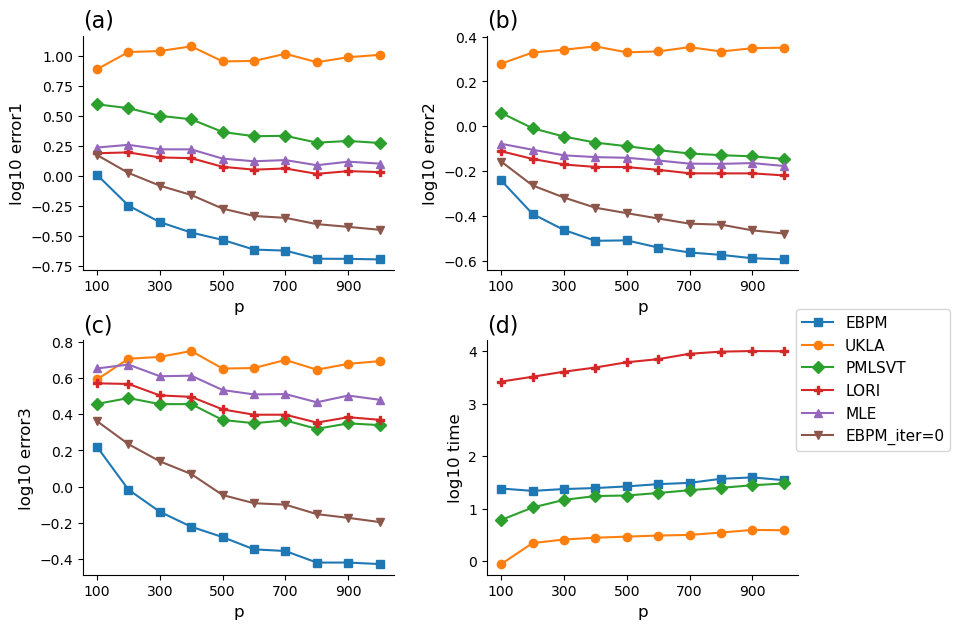

In [13]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,7))
for i in range(2):
    for j in range(2):
        axes[i][j].spines['right'].set_visible(False)
        axes[i][j].spines['top'].set_visible(False)
        axes[i][j].set_xlabel('',fontsize=12)
        axes[i][j].set_ylabel('',fontsize=12)
plt.subplots_adjust(left=None, bottom=None, right=0.84, top=None,
                wspace=0.3, hspace=0.3)
df1.plot(ax=axes[0][0],xlabel='p',ylabel='log10 error1',legend=False)
df2.plot(ax=axes[0][1],xlabel='p',ylabel='log10 error2',legend=False)
df3.plot(ax=axes[1][0],xlabel='p',ylabel='log10 error3',legend=False)
df4.plot(ax=axes[1][1],xlabel='p',ylabel='log10 time',legend=False)
for i in range(2):
    for j in range(2):
        for k, line in enumerate(axes[i][j].get_lines()):
            line.set_marker(marker[k])
axes[0][0].set_title('(a)',loc='left',fontsize=16)
axes[0][1].set_title('(b)',loc='left',fontsize=16)
axes[1][0].set_title('(c)',loc='left',fontsize=16)
axes[1][1].set_title('(d)',loc='left',fontsize=16)
lines, labels=axes[0][1].get_legend_handles_labels()
fig.legend(lines,labels,prop={'size': 11},bbox_to_anchor=(1, 0.5))
plt.savefig('figure3.pdf')
plt.show()

## change the rank of matrix 

In [14]:
df1 = pd.DataFrame(np.zeros([10,5]), 
                  index=[str(r) for r in range(5,55,5)], 
                  columns=['EBPM', 'UKLA', 'PMLSVT','LORI', 'MLE'])
df2 = pd.DataFrame(np.zeros([10,5]), 
                  index=[str(r) for r in range(5,55,5)], 
                  columns=['EBPM', 'UKLA', 'PMLSVT','LORI', 'MLE'])
df3 = pd.DataFrame(np.zeros([10,5]), 
                  index=[str(r) for r in range(5,55,5)], 
                  columns=['EBPM', 'UKLA', 'PMLSVT','LORI', 'MLE'])

In [15]:
## denoise performance
for r in range(5,55,5):
    KL_error, frob_error, nse_error = np.zeros(5), np.zeros(5), np.zeros(5)
    for n in range(1,11):
        Y = np.loadtxt('simulated data/500-100-'+str(r)+'-'+str(n)+'.txt')
        M = np.loadtxt('simulated data/500-100-'+str(r)+'-'+str(n)+'-raw.txt')
        obs = np.ones([500,100])
        M1 = np.exp(np.loadtxt('EBPM/500-100-'+str(r)+'-'+str(n)+'-denoise.txt'))
        M2 = np.loadtxt('UKLA/500-100-'+str(r)+'-'+str(n)+'-denoise.txt')
        M3 = np.loadtxt('PMLSVT/500-100-'+str(r)+'-'+str(n)+'-denoise.txt')
        M4 = np.exp(np.loadtxt('lori/500-100-'+str(r)+'-'+str(n)+'-denoise.txt'))
        M5 = Y + .5 * (Y == 0)
        KL_error = KL_error + np.array([KL(M,M1,obs),KL(M,M2,obs),KL(M,M3,obs),KL(M,M4,obs),KL(M,M5,obs)])
        frob_error = frob_error + np.array([frob(M,M1,obs),frob(M,M2,obs),frob(M,M3,obs),frob(M,M4,obs),frob(M,M5,obs)])
        nse_error = nse_error + np.array([nse(M,M1,obs),nse(M,M2,obs),nse(M,M3,obs),nse(M,M4,obs),nse(M,M5,obs)])
    df1.loc[str(r)]=np.log10(KL_error/10)
    df2.loc[str(r)]=np.log10(frob_error/10)
    df3.loc[str(r)]=np.log10(nse_error/10)

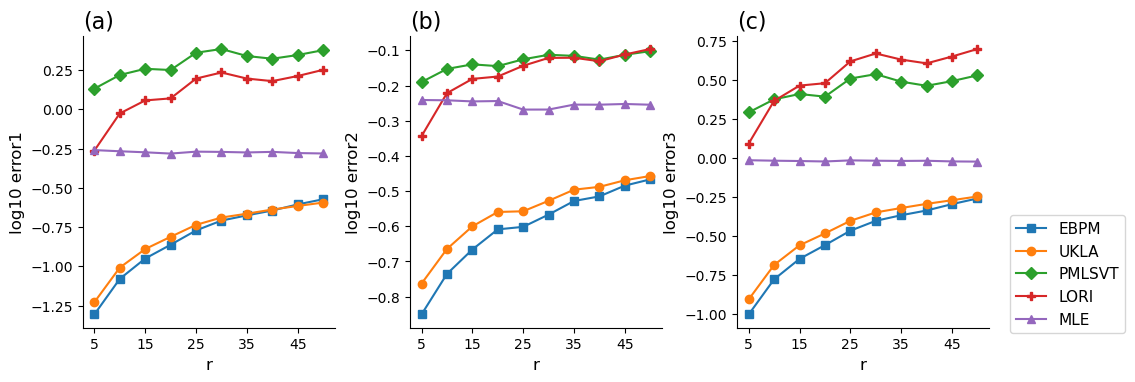

In [16]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
for i in range(3):
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].set_xlabel('',fontsize=12)
        axes[i].set_ylabel('',fontsize=12)
plt.subplots_adjust(left=None, bottom=0.15, right=0.88, top=None,
                wspace=0.3)
df1.plot(ax=axes[0],xlabel='r',ylabel='log10 error1',legend=False)
axes[0].set_title('(a)',loc='left',fontsize=16)
df2.plot(ax=axes[1],xlabel='r',ylabel='log10 error2',legend=False)
axes[1].set_title('(b)',loc='left',fontsize=16)
df3.plot(ax=axes[2],xlabel='r',ylabel='log10 error3',legend=False)
axes[2].set_title('(c)',loc='left',fontsize=16)
for i in range(3):
        for k, line in enumerate(axes[i].get_lines()):
            line.set_marker(marker[k])
lines, labels=axes[0].get_legend_handles_labels()
fig.legend(lines,labels,prop={'size': 11},bbox_to_anchor=(1, 0.45))
plt.savefig('figure2.pdf')
plt.show()

In [17]:
df1 = pd.DataFrame(np.zeros([10,6]), 
                  index=[str(r) for r in range(5,55,5)], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE', 'EBPM_iter=0'])
df2 = pd.DataFrame(np.zeros([10,6]), 
                  index=[str(r) for r in range(5,55,5)], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE', 'EBPM_iter=0'])
df3 = pd.DataFrame(np.zeros([10,6]), 
                  index=[str(r) for r in range(5,55,5)], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE', 'EBPM_iter=0'])

In [18]:
## completion performance
for r in range(5,55,5):
    KL_error, frob_error, nse_error = np.zeros(6), np.zeros(6), np.zeros(6)
    for n in range(1,11):
        Y = np.loadtxt('simulated data/500-100-'+str(r)+'-'+str(n)+'.txt')
        M = np.loadtxt('simulated data/500-100-'+str(r)+'-'+str(n)+'-raw.txt')
        obs = np.loadtxt('simulated data/500-100-'+str(r)+'-'+str(n)+'-obs.txt')
        M1 = np.exp(np.loadtxt('EBPM/500-100-'+str(r)+'-'+str(n)+'-complete.txt'))
        M2 = np.loadtxt('UKLA/500-100-'+str(r)+'-'+str(n)+'-complete.txt')
        M3 = np.loadtxt('PMLSVT/500-100-'+str(r)+'-'+str(n)+'-complete.txt')
        M4 = np.exp(np.loadtxt('lori/500-100-'+str(r)+'-'+str(n)+'-complete.txt'))
        M5 = (Y + .5 * (Y == 0))*obs + (Y*obs).sum()/obs.sum()*(1-obs)
        M6 = np.exp(np.loadtxt('EBPM_iter=0/500-100-'+str(r)+'-'+str(n)+'-complete.txt'))
        KL_error = KL_error + np.array([KL(M,M1,1-obs),KL(M,M2,1-obs),KL(M,M3,1-obs),KL(M,M4,1-obs),KL(M,M5,1-obs),KL(M,M6,1-obs)])
        frob_error = frob_error + np.array([frob(M,M1,1-obs),frob(M,M2,1-obs),frob(M,M3,1-obs),frob(M,M4,1-obs),frob(M,M5,1-obs),frob(M,M6,1-obs)])
        nse_error = nse_error + np.array([nse(M,M1,1-obs),nse(M,M2,1-obs),nse(M,M3,1-obs),nse(M,M4,1-obs),nse(M,M5,1-obs),nse(M,M6,1-obs)])
    df1.loc[str(r)]=np.log10(KL_error/10)
    df2.loc[str(r)]=np.log10(frob_error/10)
    df3.loc[str(r)]=np.log10(nse_error/10)

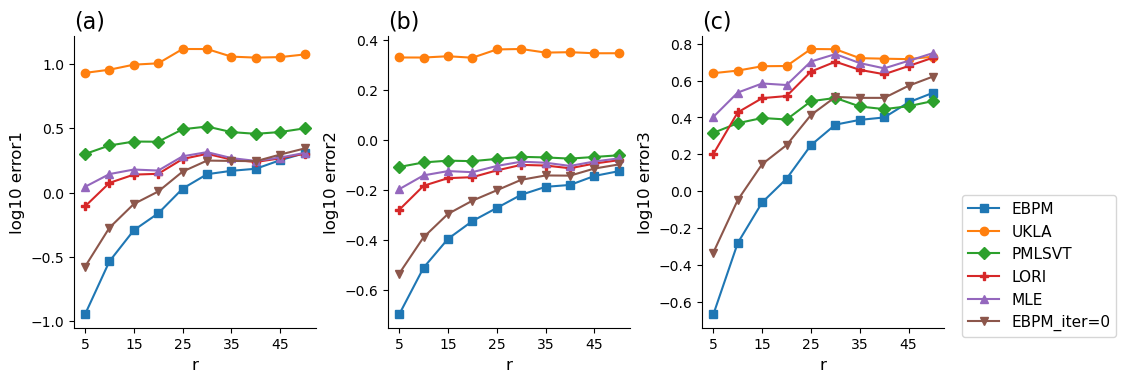

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
plt.subplots_adjust(left=None, bottom=0.15, right=0.85, top=None,
                wspace=0.3)
for i in range(3):
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].set_xlabel('',fontsize=12)
        axes[i].set_ylabel('',fontsize=12)
df1.plot(ax=axes[0],xlabel='r',ylabel='log10 error1',legend=False)
df2.plot(ax=axes[1],xlabel='r',ylabel='log10 error2',legend=False)
df3.plot(ax=axes[2],xlabel='r',ylabel='log10 error3',legend=False)
axes[0].set_title('(a)',loc='left',fontsize=16)
axes[1].set_title('(b)',loc='left',fontsize=16)
axes[2].set_title('(c)',loc='left',fontsize=16)
for i in range(3):
        for k, line in enumerate(axes[i].get_lines()):
            line.set_marker(marker[k])
lines, labels=axes[0].get_legend_handles_labels()
fig.legend(lines,labels,prop={'size': 11},bbox_to_anchor=(1, 0.5))
plt.savefig('figure4.pdf')
plt.show()

## change the proportion of observations 

In [20]:
df1 = pd.DataFrame(np.zeros([9,6]), 
                  index=[str(r) for r in np.arange(1,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE', 'EBPM_iter=0'])
df2 = pd.DataFrame(np.zeros([9,6]), 
                  index=[str(r) for r in np.arange(1,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE', 'EBPM_iter=0'])
df3 = pd.DataFrame(np.zeros([9,6]), 
                  index=[str(r) for r in np.arange(1,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE', 'EBPM_iter=0'])

In [21]:
## completion performance
for r in np.arange(1,10)/10:
    KL_error, frob_error, nse_error = np.zeros(6), np.zeros(6), np.zeros(6)
    for n in range(1,11):
        Y = np.loadtxt('simulated data/500-100-10-'+str(n)+'.txt')
        M = np.loadtxt('simulated data/500-100-10-'+str(n)+'-raw.txt')
        obs = np.loadtxt('simulated data/500-100-'+str(n)+'-'+str(r)+'-obs.txt')
        M1 = np.exp(np.loadtxt('EBPM/500-100-'+str(n)+'-'+str(r)+'-complete.txt'))
        M2 = np.loadtxt('UKLA/500-100-'+str(n)+'-'+str(r)+'-complete.txt')
        M3 = np.loadtxt('PMLSVT/500-100-'+str(n)+'-'+str(r)+'-complete.txt')
        M4 = np.exp(np.loadtxt('lori/500-100-'+str(n)+'-'+str(r)+'-complete.txt'))
        M5 = (Y + .5 * (Y == 0))*obs + (Y*obs).sum()/obs.sum()*(1-obs)
        M6 = np.exp(np.loadtxt('EBPM_iter=0/500-100-'+str(n)+'-'+str(r)+'-complete.txt'))
        KL_error = KL_error + np.array([KL(M,M1,1-obs),KL(M,M2,1-obs),KL(M,M3,1-obs),KL(M,M4,1-obs),KL(M,M5,1-obs),KL(M,M6,1-obs)])
        frob_error = frob_error + np.array([frob(M,M1,1-obs),frob(M,M2,1-obs),frob(M,M3,1-obs),frob(M,M4,1-obs),frob(M,M5,1-obs),frob(M,M6,1-obs)])
        nse_error = nse_error + np.array([nse(M,M1,1-obs),nse(M,M2,1-obs),nse(M,M3,1-obs),nse(M,M4,1-obs),nse(M,M5,1-obs),nse(M,M6,1-obs)])
    df1.loc[str(r)]=np.log10(KL_error/10)
    df2.loc[str(r)]=np.log10(frob_error/10)
    df3.loc[str(r)]=np.log10(nse_error/10)

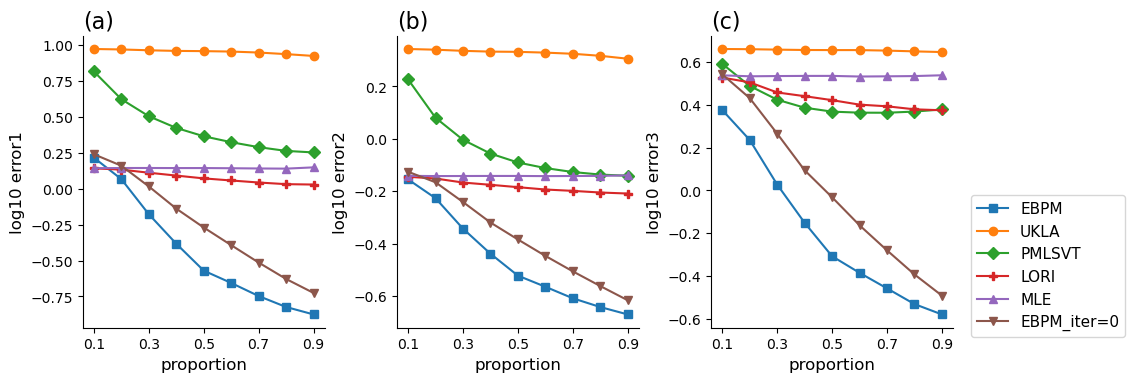

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
plt.subplots_adjust(left=None, bottom=0.15, right=0.85, top=None,
                wspace=0.3)
for i in range(3):
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].set_xlabel('',fontsize=12)
        axes[i].set_ylabel('',fontsize=12)
df1.plot(ax=axes[0],xlabel='proportion',ylabel='log10 error1',legend=False)
df2.plot(ax=axes[1],xlabel='proportion',ylabel='log10 error2',legend=False)
df3.plot(ax=axes[2],xlabel='proportion',ylabel='log10 error3',legend=False)
axes[0].set_title('(a)',loc='left',fontsize=16)
axes[1].set_title('(b)',loc='left',fontsize=16)
axes[2].set_title('(c)',loc='left',fontsize=16)
for i in range(3):
        for k, line in enumerate(axes[i].get_lines()):
            line.set_marker(marker[k])
lines, labels=axes[0].get_legend_handles_labels()
fig.legend(lines,labels,prop={'size': 11},bbox_to_anchor=(1, 0.5))
plt.savefig('figure5.pdf')
plt.show()

# Real data

## Loss function 

In [23]:
# Frobenius loss
def frob(X, Xhat, obs):
    X=np.array(X)
    Xhat=np.array(Xhat)
    obs=np.array(obs)
    return ((((Xhat-X) * obs)**2).sum()/obs.sum())**(1/2)

In [24]:
# normalized squared error loss
def nse(X, Xhat, obs):
    X=np.array(X)
    Xhat=np.array(Xhat)
    obs=np.array(obs)
    return ((Xhat * obs - X * obs)**2 / (X + 1)).sum()/obs.sum()

In [25]:
# Negative log likelihood
from scipy.special import gammaln
def logL(X, Xhat, obs):
    X=np.array(X)
    Xhat=np.array(Xhat)
    obs=np.array(obs)
    return -((X*np.log(Xhat)-Xhat-gammaln(X+1))*obs).sum()/obs.sum()

## hic data 

In [26]:
df1 = pd.DataFrame(np.zeros([5,6]), 
                  index=[str(r) for r in np.arange(5,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE', 'EBPM_iter=0'])
df2 = pd.DataFrame(np.zeros([5,6]), 
                  index=[str(r) for r in np.arange(5,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE', 'EBPM_iter=0'])
df3 = pd.DataFrame(np.zeros([5,6]), 
                  index=[str(r) for r in np.arange(5,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE', 'EBPM_iter=0'])

In [27]:
## completion performance
for r in np.arange(5,10)/10:
    frob_error, nse_error, logL_error = np.zeros(6), np.zeros(6), np.zeros(6)
    for n in range(1,11):
        Y = np.loadtxt('real data/hic_chr22_24_32_36mb.csv')
        M=np.copy(Y)
        obs = np.loadtxt('real data/hic-'+str(n)+'-'+str(r)+'-obs.txt')
        M1 = np.exp(np.loadtxt('EBPM/hic-'+str(n)+'-'+str(r)+'-complete.txt'))
        M2 = np.loadtxt('UKLA/hic-'+str(n)+'-'+str(r)+'-complete.txt')
        M3 = np.loadtxt('PMLSVT/hic-'+str(r)+'-'+str(n)+'-complete.txt')
        M4 = np.exp(np.loadtxt('lori/hic-'+str(n)+'-'+str(r)+'-complete.txt'))
        M5 = (Y + .5 * (Y == 0))*obs + (Y*obs).sum()/obs.sum()*(1-obs)
        M6 = np.exp(np.loadtxt('EBPM_iter=0/hic-'+str(n)+'-'+str(r)+'-complete.txt'))
        frob_error = frob_error + np.array([frob(M,M1,1-obs),frob(M,M2,1-obs),frob(M,M3,1-obs),frob(M,M4,1-obs),frob(M,M5,1-obs),frob(M,M6,1-obs)])
        nse_error = nse_error + np.array([nse(M,M1,1-obs),nse(M,M2,1-obs),nse(M,M3,1-obs),nse(M,M4,1-obs),nse(M,M5,1-obs),nse(M,M6,1-obs)])
        logL_error = logL_error + np.array([logL(M,M1,1-obs),logL(M,M2,1-obs),logL(M,M3,1-obs),logL(M,M4,1-obs),logL(M,M5,1-obs),logL(M,M6,1-obs)])
    df1.loc[str(r)]=np.log10(frob_error/10)
    df2.loc[str(r)]=np.log10(nse_error/10)
    df3.loc[str(r)]=np.log10(logL_error/10)

In [28]:
n=10
r=0.8
obs = np.loadtxt('real data/hic-'+str(n)+'-'+str(r)+'-obs.txt')
M1 = np.exp(np.loadtxt('EBPM/hic-'+str(n)+'-'+str(r)+'-complete.txt'))
M4 = np.exp(np.loadtxt('lori/hic-'+str(n)+'-'+str(r)+'-complete.txt'))
M5 = (Y + .5 * (Y == 0))*obs + (Y*obs).sum()/obs.sum()*(1-obs)

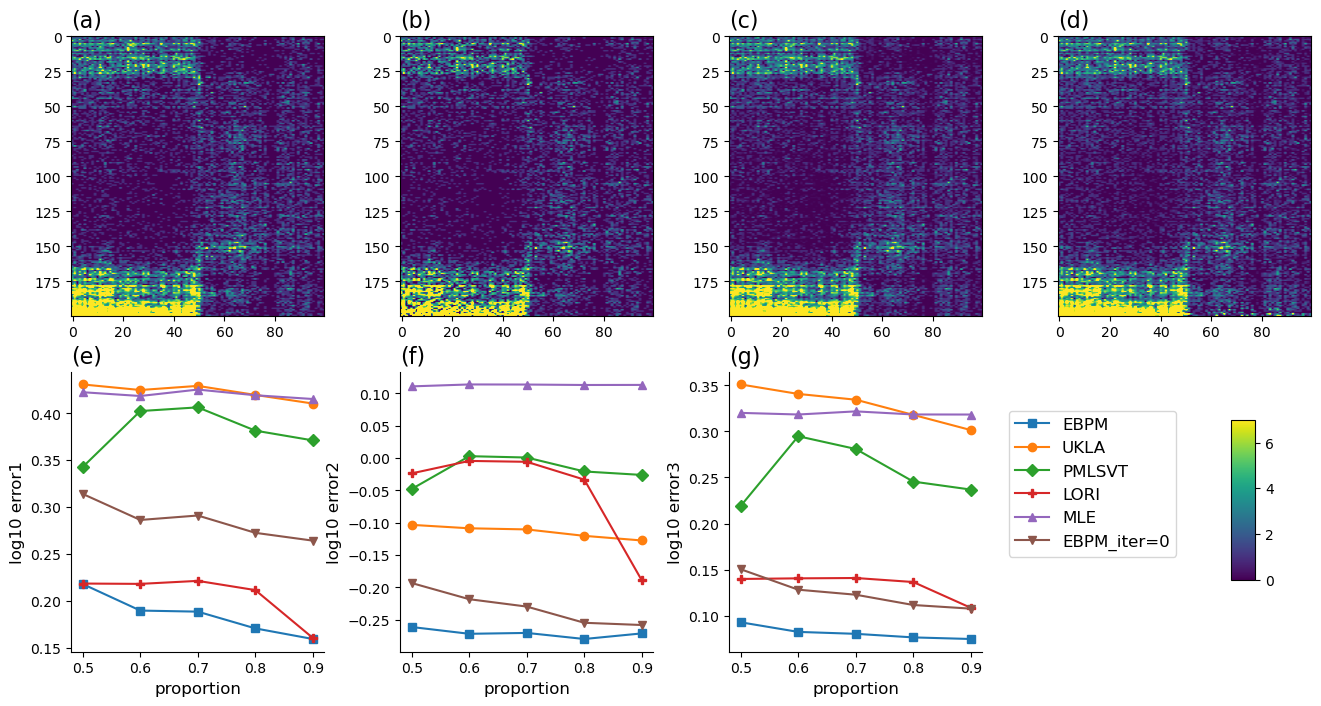

In [29]:
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(16,8))
for i in range(2):
    for j in range(4):
        axes[i][j].set_xlabel('',fontsize=12)
        axes[i][j].set_ylabel('',fontsize=12)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.3)
axes[0][0].imshow(Y,vmax=7,vmin=0,aspect='auto')
axes[0][1].imshow(Y*obs,vmax=7,vmin=0,aspect='auto')
im3=axes[0][2].imshow(Y*obs+M1*(1-obs),vmax=7,vmin=0,aspect='auto')
axes[0][3].imshow(Y*obs+M4*(1-obs),vmax=7,vmin=0,aspect='auto')
position = fig.add_axes([0.85, 0.2, 0.015, .2 ])
fig.colorbar(im3, cax=position)
for i in range(4):
        axes[1][i].spines['right'].set_visible(False)
        axes[1][i].spines['top'].set_visible(False)
axes[1][3].axis('off')
df1.plot(ax=axes[1][0],xlabel='proportion',ylabel='log10 error1',legend=False)
df2.plot(ax=axes[1][1],xlabel='proportion',ylabel='log10 error2',legend=False)
df3.plot(ax=axes[1][2],xlabel='proportion',ylabel='log10 error3',legend=False)
for i in range(3):
        for k, line in enumerate(axes[1][i].get_lines()):
            line.set_marker(marker[k])
ax=axes[1][2]
ax.legend(loc=5, prop={'size': 12},bbox_to_anchor=(1.8, 0.6))
axes[0][0].set_title('(a)',loc='left',fontsize=16)
axes[0][1].set_title('(b)',loc='left',fontsize=16)
axes[0][2].set_title('(c)',loc='left',fontsize=16)
axes[0][3].set_title('(d)',loc='left',fontsize=16)
axes[1][0].set_title('(e)',loc='left',fontsize=16)
axes[1][1].set_title('(f)',loc='left',fontsize=16)
axes[1][2].set_title('(g)',loc='left',fontsize=16)
plt.savefig('figure6.pdf')
plt.show()

## bike data 

In [30]:
df1 = pd.DataFrame(np.zeros([5,6]), 
                  index=[str(r) for r in np.arange(5,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT','LORI', 'MLE', 'EBPM_iter=0'])
df2 = pd.DataFrame(np.zeros([5,6]), 
                  index=[str(r) for r in np.arange(5,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT','LORI', 'MLE', 'EBPM_iter=0'])
df3 = pd.DataFrame(np.zeros([5,6]), 
                  index=[str(r) for r in np.arange(5,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE', 'EBPM_iter=0'])

In [31]:
## completion performance
for r in np.arange(5,10)/10:
    frob_error, nse_error, logL_error = np.zeros(6), np.zeros(6), np.zeros(6)
    for n in range(1,11):
        Y = np.loadtxt('real data/bike.csv')
        M=np.copy(Y)
        obs = np.loadtxt('real data/bike-'+str(n)+'-'+str(r)+'-obs.txt')
        M1 = np.exp(np.loadtxt('EBPM/bike-'+str(n)+'-'+str(r)+'-complete.txt'))
        M2 = np.loadtxt('UKLA/bike-'+str(n)+'-'+str(r)+'-complete.txt')
        M3 = np.loadtxt('PMLSVT/bike-'+str(r)+'-'+str(n)+'-complete.txt')
        M4 = np.exp(np.loadtxt('lori/bike-'+str(n)+'-'+str(r)+'-complete.txt'))
        M5 = (Y + .5 * (Y == 0))*obs + (Y*obs).sum()/obs.sum()*(1-obs)
        M6 = np.exp(np.loadtxt('EBPM_iter=0/bike-'+str(n)+'-'+str(r)+'-complete.txt'))
        frob_error = frob_error + np.array([frob(M,M1,1-obs),frob(M,M2,1-obs),frob(M,M3,1-obs),frob(M,M4,1-obs),frob(M,M5,1-obs),frob(M,M6,1-obs)])
        nse_error = nse_error + np.array([nse(M,M1,1-obs),nse(M,M2,1-obs),nse(M,M3,1-obs),nse(M,M4,1-obs),nse(M,M5,1-obs),nse(M,M6,1-obs)])
        logL_error = logL_error + np.array([logL(M,M1,1-obs),logL(M,M2,1-obs),logL(M,M3,1-obs),logL(M,M4,1-obs),logL(M,M5,1-obs),logL(M,M6,1-obs)])
    df1.loc[str(r)]=np.log10(frob_error/10)
    df2.loc[str(r)]=np.log10(nse_error/10)
    df3.loc[str(r)]=np.log10(logL_error/10)

In [32]:
n=1
r=0.8
obs = np.loadtxt('real data/bike-'+str(n)+'-'+str(r)+'-obs.txt')
M1 = np.exp(np.loadtxt('EBPM/bike-'+str(n)+'-'+str(r)+'-complete.txt'))
M3 = np.loadtxt('PMLSVT/bike-'+str(r)+'-'+str(n)+'-complete.txt')
M5 = (Y + .5 * (Y == 0))*obs + (Y*obs).sum()/obs.sum()*(1-obs)

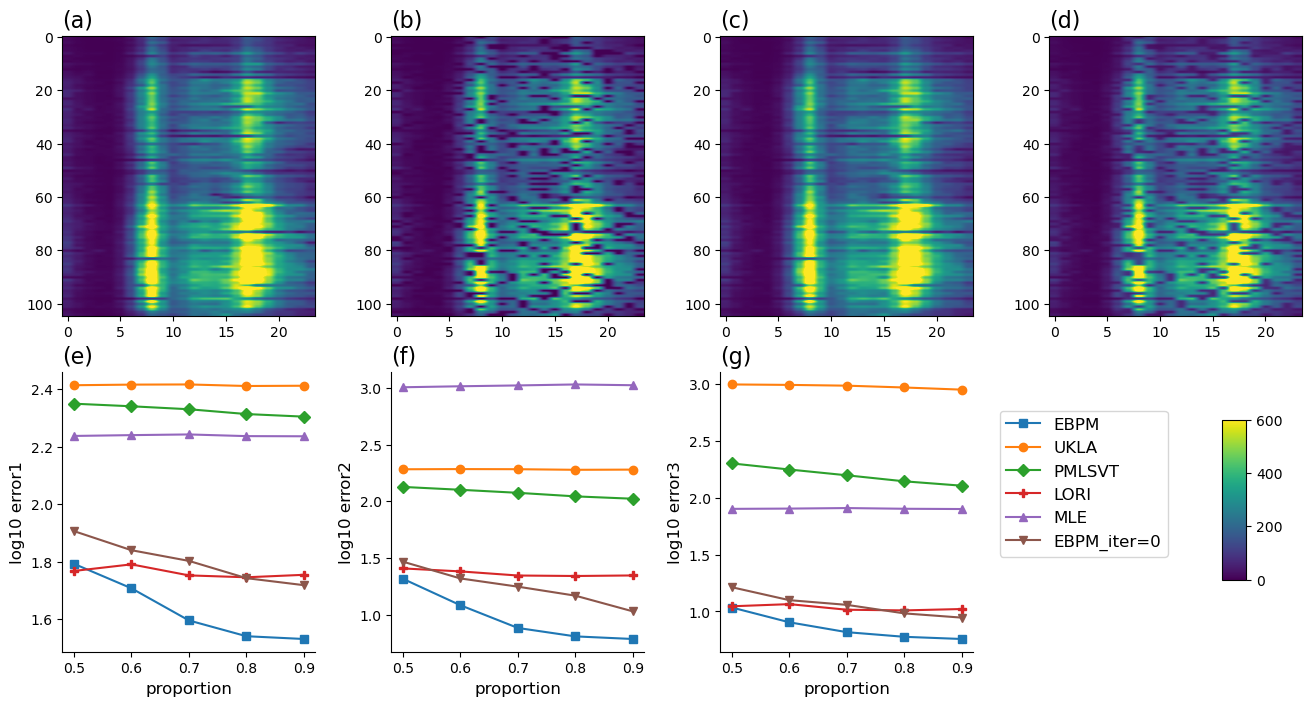

In [33]:
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(16,8))
for i in range(2):
    for j in range(4):
        axes[i][j].set_xlabel('',fontsize=12)
        axes[i][j].set_ylabel('',fontsize=12)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.3)
axes[0][0].imshow(Y,vmax=600,vmin=0,aspect='auto')
axes[0][1].imshow(Y*obs,vmax=600,vmin=0,aspect='auto')
im3=axes[0][2].imshow(Y*obs+M1*(1-obs),vmax=600,vmin=0,aspect='auto')
axes[0][3].imshow(Y*obs+M3*(1-obs),vmax=600,vmin=0,aspect='auto')
position = fig.add_axes([0.85, 0.2, 0.015, .2 ])
fig.colorbar(im3, cax=position)
for i in range(4):
        axes[1][i].spines['right'].set_visible(False)
        axes[1][i].spines['top'].set_visible(False)
axes[1][3].axis('off')
df1.plot(ax=axes[1][0],xlabel='proportion',ylabel='log10 error1',legend=False)
df2.plot(ax=axes[1][1],xlabel='proportion',ylabel='log10 error2',legend=False)
df3.plot(ax=axes[1][2],xlabel='proportion',ylabel='log10 error3',legend=False)
for i in range(3):
        for k, line in enumerate(axes[1][i].get_lines()):
            line.set_marker(marker[k])
ax=axes[1][2]
ax.legend(loc=5, prop={'size': 12},bbox_to_anchor=(1.8, 0.6))
axes[0][0].set_title('(a)',loc='left',fontsize=16)
axes[0][1].set_title('(b)',loc='left',fontsize=16)
axes[0][2].set_title('(c)',loc='left',fontsize=16)
axes[0][3].set_title('(d)',loc='left',fontsize=16)
axes[1][0].set_title('(e)',loc='left',fontsize=16)
axes[1][1].set_title('(f)',loc='left',fontsize=16)
axes[1][2].set_title('(g)',loc='left',fontsize=16)
plt.savefig('figure7.pdf')
plt.show()

## Brain image data 

In [34]:
df1 = pd.DataFrame(np.zeros([5,6]), 
                  index=[str(r) for r in np.arange(5,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT','LORI', 'MLE', 'EBPM_iter=0'])
df2 = pd.DataFrame(np.zeros([5,6]), 
                  index=[str(r) for r in np.arange(5,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT','LORI', 'MLE', 'EBPM_iter=0'])
df3 = pd.DataFrame(np.zeros([5,6]), 
                  index=[str(r) for r in np.arange(5,10)/10], 
                  columns=['EBPM', 'UKLA', 'PMLSVT', 'LORI', 'MLE', 'EBPM_iter=0'])

In [35]:
## completion performance
for r in np.arange(5,10)/10:
    frob_error, nse_error, logL_error = np.zeros(6), np.zeros(6), np.zeros(6)
    for n in range(1,11):
        Y = np.loadtxt('real data/brain_image.csv')
        M=np.copy(Y)
        obs = np.loadtxt('real data/brain_image-'+str(n)+'-'+str(r)+'-obs.txt')
        M1 = np.exp(np.loadtxt('EBPM/brain_image-'+str(n)+'-'+str(r)+'-complete.txt'))
        M2 = np.loadtxt('UKLA/brain_image-'+str(n)+'-'+str(r)+'-complete.txt')
        M3 = np.loadtxt('PMLSVT/brain_image-'+str(r)+'-'+str(n)+'-complete.txt')
        M4 = np.exp(np.loadtxt('lori/brain_image-'+str(n)+'-'+str(r)+'-complete.txt'))
        M5 = (Y + .5 * (Y == 0))*obs + (Y*obs).sum()/obs.sum()*(1-obs)
        M6 = np.exp(np.loadtxt('EBPM_iter=0/brain_image-'+str(n)+'-'+str(r)+'-complete.txt'))
        frob_error = frob_error + np.array([frob(M,M1,1-obs),frob(M,M2,1-obs),frob(M,M3,1-obs),frob(M,M4,1-obs),frob(M,M5,1-obs),frob(M,M6,1-obs)])
        nse_error = nse_error + np.array([nse(M,M1,1-obs),nse(M,M2,1-obs),nse(M,M3,1-obs),nse(M,M4,1-obs),nse(M,M5,1-obs),nse(M,M6,1-obs)])
        logL_error = logL_error + np.array([logL(M,M1,1-obs),logL(M,M2,1-obs),logL(M,M3,1-obs),logL(M,M4,1-obs),logL(M,M5,1-obs),logL(M,M6,1-obs)])
    df1.loc[str(r)]=np.log10(frob_error/10)
    df2.loc[str(r)]=np.log10(nse_error/10)
    df3.loc[str(r)]=np.log10(logL_error/10)

In [36]:
n=2
r=0.8
obs = np.loadtxt('real data/brain_image-'+str(n)+'-'+str(r)+'-obs.txt')
M1 = np.exp(np.loadtxt('EBPM/brain_image-'+str(n)+'-'+str(r)+'-complete.txt'))
M2 = np.loadtxt('UKLA/brain_image-'+str(n)+'-'+str(r)+'-complete.txt')
M3 = np.loadtxt('PMLSVT/brain_image-'+str(r)+'-'+str(n)+'-complete.txt')
M4 = np.exp(np.loadtxt('lori/brain_image-'+str(n)+'-'+str(r)+'-complete.txt'))
M5 = (Y + .5 * (Y == 0))*obs + (Y*obs).sum()/obs.sum()*(1-obs)

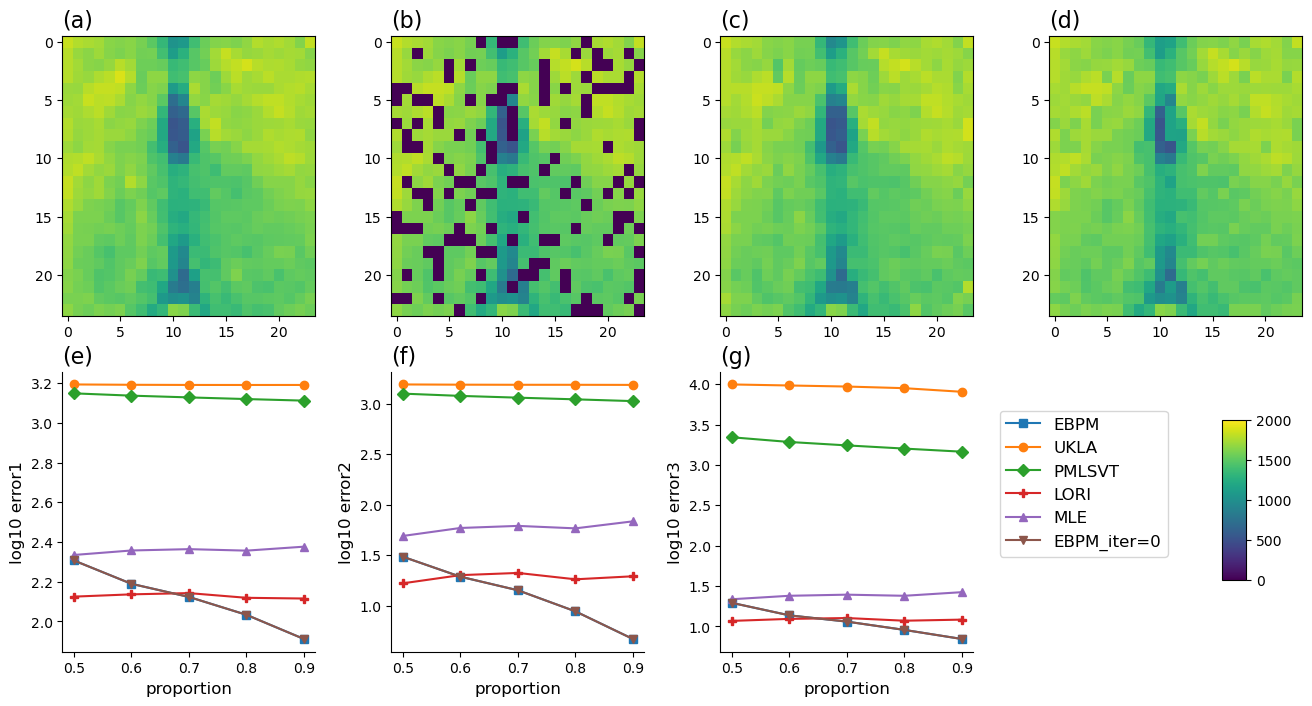

In [37]:
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(16,8))
for i in range(2):
    for j in range(4):
        axes[i][j].set_xlabel('',fontsize=12)
        axes[i][j].set_ylabel('',fontsize=12)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.3)
axes[0][0].imshow(Y,vmax=2000,vmin=0,aspect='auto')
axes[0][1].imshow(Y*obs,vmax=2000,vmin=0,aspect='auto')
im3=axes[0][2].imshow(Y*obs+M1*(1-obs),vmax=2000,vmin=0,aspect='auto')
axes[0][3].imshow(Y*obs+M4*(1-obs),vmax=2000,vmin=0,aspect='auto')
position = fig.add_axes([0.85, 0.2, 0.015, .2 ])
fig.colorbar(im3, cax=position)
for i in range(4):
        axes[1][i].spines['right'].set_visible(False)
        axes[1][i].spines['top'].set_visible(False)
axes[1][3].axis('off')
df1.plot(ax=axes[1][0],xlabel='proportion',ylabel='log10 error1',legend=False)
df2.plot(ax=axes[1][1],xlabel='proportion',ylabel='log10 error2',legend=False)
df3.plot(ax=axes[1][2],xlabel='proportion',ylabel='log10 error3',legend=False)
for i in range(3):
        for k, line in enumerate(axes[1][i].get_lines()):
            line.set_marker(marker[k])
ax=axes[1][2]
ax.legend(loc=5, prop={'size': 12},bbox_to_anchor=(1.8, 0.6))
axes[0][0].set_title('(a)',loc='left',fontsize=16)
axes[0][1].set_title('(b)',loc='left',fontsize=16)
axes[0][2].set_title('(c)',loc='left',fontsize=16)
axes[0][3].set_title('(d)',loc='left',fontsize=16)
axes[1][0].set_title('(e)',loc='left',fontsize=16)
axes[1][1].set_title('(f)',loc='left',fontsize=16)
axes[1][2].set_title('(g)',loc='left',fontsize=16)
plt.savefig('figure8.pdf')
plt.show()